<a href="https://colab.research.google.com/github/springsnowdrop/202206_technical_assignment_dsde/blob/master/datascraping_airquality_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#correct coding in colab environment
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing/data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.1 MB/s 
     |████████████████████████████████| 358 kB 49.4 MB/s 
     |████████████████████████████████| 138 kB 43.1 MB/s 
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 4.0 MB 36.1 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://se

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [2]:
from bs4 import BeautifulSoup

#browser = webdriver.Chrome(executable_path=r"X:\Users\2519376\Downloads\chromedriver_win32\chromedriver.exe")
url = ('https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing/data')
wd.get(url)
html_source = wd.page_source
wd.quit()
soup = BeautifulSoup(html_source, 'html.parser')
for name_list in soup.find_all(class_ ='dropdown-row'):
    print(name_list.text)

'<html lang="en"><head>\n  <meta charset="utf-8">\n  <title>CCR</title>\n  <base href="./">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <link rel="icon" type="image/x-icon" href="favicon.ico">\n<style type="text/css">/*! jQuery UI - v1.12.0 - 2016-08-09\r\n* http://jqueryui.com\r\n* Includes: draggable.css, core.css, resizable.css, selectable.css, sortable.css, accordion.css, autocomplete.css, menu.css, button.css, controlgroup.css, checkboxradio.css, datepicker.css, dialog.css, progressbar.css, selectmenu.css, slider.css, spinner.css, tabs.css, tooltip.css, theme.css\r\n* To view and modify this theme, visit http://jqueryui.com/themeroller/?scope=&folderName=custom-theme&bgImgOpacityError=&bgImgOpacityHighlight=&bgImgOpacityActive=&bgImgOpacityHover=&bgImgOpacityDefault=&bgImgOpacityContent=&bgImgOpacityHeader=&cornerRadiusShadow=8px&offsetLeftShadow=0px&offsetTopShadow=0px&thicknessShadow=5px&opacityShadow=30&bgImgOpacityShadow=0&bgTextureShadow=flat&bg
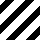
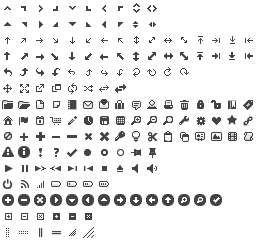
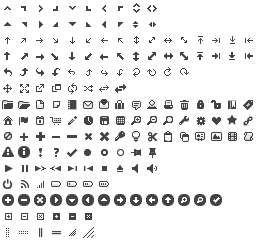
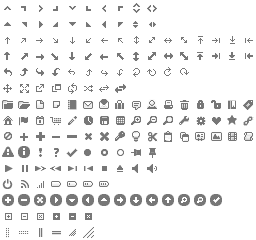
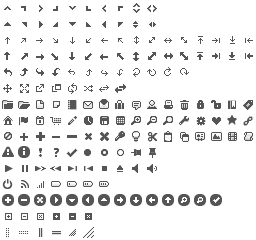
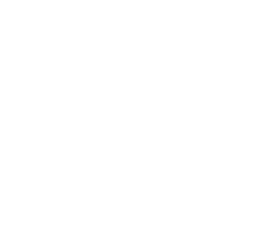
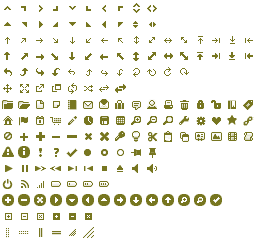
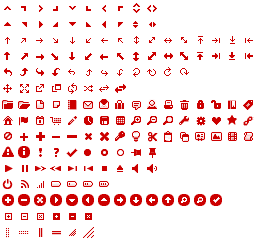
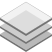
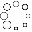
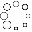
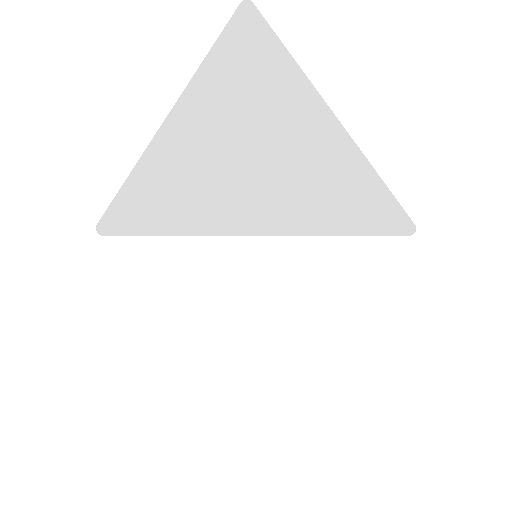
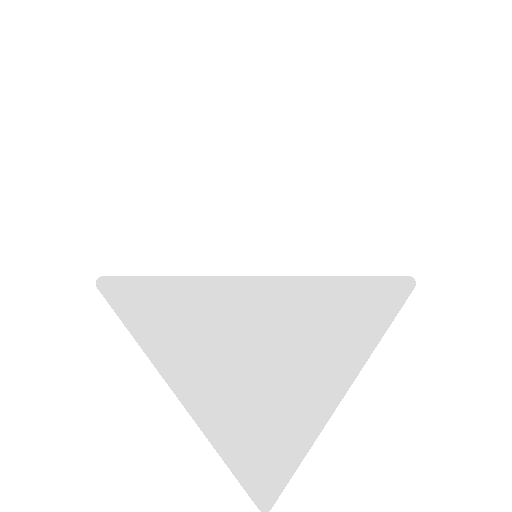

In [3]:
html_source

<html lang="en"><head>
<meta charset="utf-8"/>
<title>CCR</title>
<base href="./"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="favicon.ico" rel="icon" type="image/x-icon"/>
<style type="text/css">/*! jQuery UI - v1.12.0 - 2016-08-09
* http://jqueryui.com
* Includes: draggable.css, core.css, resizable.css, selectable.css, sortable.css, accordion.css, autocomplete.css, menu.css, button.css, controlgroup.css, checkboxradio.css, datepicker.css, dialog.css, progressbar.css, selectmenu.css, slider.css, spinner.css, tabs.css, tooltip.css, theme.css
* To view and modify this theme, visit http://jqueryui.com/themeroller/?scope=&folderName=custom-theme&bgImgOpacityError=&bgImgOpacityHighlight=&bgImgOpacityActive=&bgImgOpacityHover=&bgImgOpacityDefault=&bgImgOpacityContent=&bgImgOpacityHeader=&cornerRadiusShadow=8px&offsetLeftShadow=0px&offsetTopShadow=0px&thicknessShadow=5px&opacityShadow=30&bgImgOpacityShadow=0&bgTextureShadow=flat&bgColorShadow=%23666666&
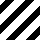
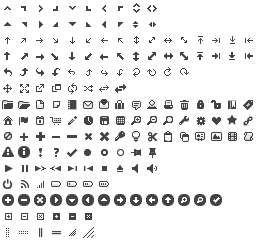
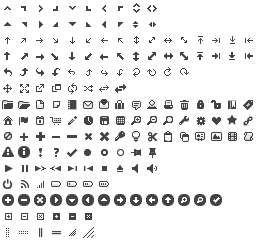
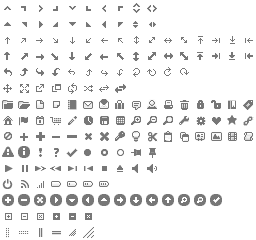
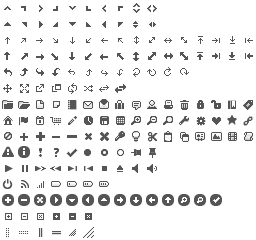
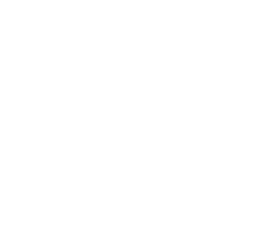
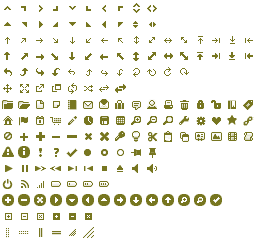
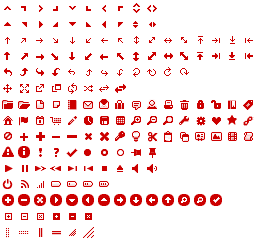
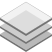
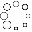
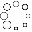
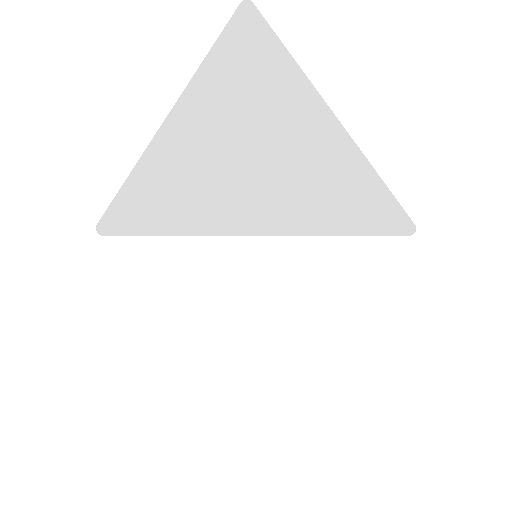
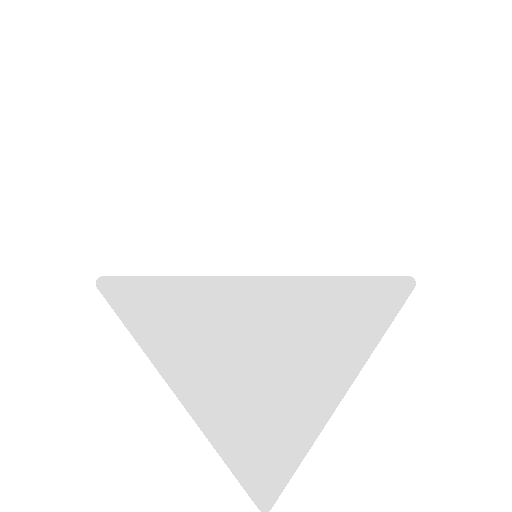

In [4]:
soup

In [5]:
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
#To click on drop down list
#wd.findElement(By.id("dropdownlistone")).click()
wd.find_element(By.XPATH, '/html/body/app-root/app-caaqm-dashboard/div[1]/div/main/section/app-caaqm-view-data/div/div/div[2]/div[2]/div/div/multi-select/angular2-multiselect/div/div[1]/div/div/div/span[1]')

#To select a data from the drop down list
#wd.findElement(By.linkText("West Bengal")).click()

MaxRetryError: ignored

In [7]:
import requests
import pandas as pd

# create session to get and keep cookies
s = requests.Session()

# get page and cookies
url = 'https://app.cpcbccr.com/ccr/#/caaqm-dashboard-all/caaqm-landing/data'
k = s.get(url)
# get HTML with tables
Statename = ['West Bengal']
CityName = ['Kolkata']
StationName=['Ballygunge,Kolkata - WBPCB']
Criteria=['24 Hours']
#DateFrom=